In [1]:
#Importing necessary LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, accuracy_score, precision_score, \
f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Reading the CSV file

Electrical_data = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
Electrical_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
#Checking for empty values, turns out there are none.

Electrical_data.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
Electrical_data.stabf.unique()

array(['unstable', 'stable'], dtype=object)

In [6]:
#Dropping stab column

Electrical_data = Electrical_data.drop(columns=["stab"])

In [7]:
Electrical_data["stabf"]

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

In [8]:
#encode categorical variable

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Electrical_data["stabf"] = encoder.fit_transform(Electrical_data["stabf"])

In [9]:
Electrical_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [10]:
encoder.classes_

array(['stable', 'unstable'], dtype=object)

In [11]:
#Defining the X features (independent variable)

X = Electrical_data.drop(columns=["stabf"]) 

In [12]:
#Target

y = Electrical_data["stabf"] 

In [13]:
X.shape, y.shape, y.value_counts()

((10000, 12),
 (10000,),
 1    6380
 0    3620
 Name: stabf, dtype: int64)

In [14]:
#Data Splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
#Transform the data using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_normal_train = scaler.fit(X_train)
X_normal_train = scaler.transform(X_train)

X_normal_train = pd.DataFrame(X_normal_train, columns=X_train.columns)

X_normal_test = X_test.reset_index(drop=True)
X_normal_test = scaler.transform(X_test)
X_normal_test = pd.DataFrame(X_normal_test, columns=X_test.columns)

In [17]:
X_normal_train.head(), X_normal_train.shape

(       tau1      tau2      tau3      tau4        p1        p2        p3  \
 0  0.367327 -0.986042  0.650447  1.547527 -0.291490  0.061535  1.293862   
 1 -0.064659  0.089437  1.035079 -1.641494  0.619865 -0.067235 -1.502925   
 2 -1.467850  1.298418 -0.502536  1.166046 -0.180521  0.490603  0.682560   
 3  0.820081  0.529920  1.299657 -1.141975 -0.812854 -0.763632  1.521579   
 4  0.665424 -1.425627  0.312300  0.919137 -1.614296  0.760315  1.422019   
 
          p4        g1        g2        g3        g4  
 0 -0.845074  0.160918  0.339859  0.585568  0.492239  
 1  0.486613 -0.293143 -1.558488  1.429649 -1.443521  
 2 -0.855302  1.399350  1.451534 -1.045743  0.492489  
 3  0.658780 -0.958319  1.361958  1.604140  0.275303  
 4  0.639243  1.676895  0.695660  1.137504 -1.312575  ,
 (8000, 12))

RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=1)

clf.fit(X_normal_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [19]:
#Predictions on test dataset

y_pred = clf.predict(X_normal_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [20]:
#Probability PREDICTION

y_prob = clf.predict_proba(X_normal_test)
y_prob

array([[0.09, 0.91],
       [0.05, 0.95],
       [0.76, 0.24],
       ...,
       [0.74, 0.26],
       [0.5 , 0.5 ],
       [0.32, 0.68]])

In [21]:
#Creating a confusion matrix

pd.crosstab(y_test, y_pred, rownames=["Predicted Values"], colnames=["Actual Values"])

Actual Values,0,1
Predicted Values,,
0,625,87
1,55,1233


In [22]:
#check the most important feautures

list(zip(X_normal_train.columns, clf.feature_importances_.round(3)))

[('tau1', 0.124),
 ('tau2', 0.126),
 ('tau3', 0.122),
 ('tau4', 0.121),
 ('p1', 0.029),
 ('p2', 0.031),
 ('p3', 0.03),
 ('p4', 0.029),
 ('g1', 0.091),
 ('g2', 0.098),
 ('g3', 0.1),
 ('g4', 0.097)]

In [23]:
sorted(clf.feature_importances_.round(3))

[0.029,
 0.029,
 0.03,
 0.031,
 0.091,
 0.097,
 0.098,
 0.1,
 0.121,
 0.122,
 0.124,
 0.126]

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)

0.929

In [26]:
precision_score(y_test, y_pred)

0.9340909090909091

In [27]:
recall_score(y_test,y_pred)

0.9572981366459627

In [28]:
f1_score(y_test,y_pred)

0.9455521472392638

In [29]:
accuracy_score(y_test, y_pred).round(4)

0.929

EXTRA TREE CLASSIFIER

In [30]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
etc.fit(X_normal_train,y_train)

ExtraTreeClassifier()

In [31]:
y_pred_etc = etc.predict(X_normal_test)
y_pred_etc

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
confusion_matrix(y_test, y_pred_etc)

array([[ 468,  244],
       [ 214, 1074]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred_etc)

0.771

In [34]:
precision_score(y_test, y_pred_etc)

0.8148710166919575

In [35]:
#Classification report of Extra Tree Classifier 

print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       712
           1       0.81      0.83      0.82      1288

    accuracy                           0.77      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.77      0.77      0.77      2000



In [36]:
#Classification report of Random Forest Classifier 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [37]:
list(zip(X_normal_train.columns, etc.feature_importances_.round(4)))

[('tau1', 0.1173),
 ('tau2', 0.1197),
 ('tau3', 0.1187),
 ('tau4', 0.1232),
 ('p1', 0.0299),
 ('p2', 0.0359),
 ('p3', 0.0401),
 ('p4', 0.0367),
 ('g1', 0.0856),
 ('g2', 0.0963),
 ('g3', 0.0939),
 ('g4', 0.1028)]

In [38]:
sorted(etc.feature_importances_.round(4))

[0.0299,
 0.0359,
 0.0367,
 0.0401,
 0.0856,
 0.0939,
 0.0963,
 0.1028,
 0.1173,
 0.1187,
 0.1197,
 0.1232]

XGBOOST CLASSIFIER

In [39]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_normal_train, y_train)

[17:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [40]:
#xgboost predictions

y_pred_xgb = xgb_model.predict(X_normal_test)
y_pred_xgb

array([1, 1, 0, ..., 0, 1, 1])

In [41]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 648,   64],
       [  45, 1243]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred_xgb)

0.9455

In [43]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



LIGHTGBM MODEL

In [44]:
import lightgbm as lgb

In [45]:
#load dataset into lightgbm
data = X_normal_train
label = y_train  #binary class target

train_data = lgb.Dataset(data, label=label)
validation_data = lgb.Dataset(X_normal_test, label=y_test, reference=train_data)

param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']

In [46]:
#train the model
num_round = 100
lgb_model = lgb.train(param, train_data, num_round, valid_sets=[validation_data])

[LightGBM] [Info] Number of positive: 5092, number of negative: 2908
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636500 -> initscore=0.560205
[LightGBM] [Info] Start training from score 0.560205
[1]	valid_0's auc: 0.877141	valid_0's binary_logloss: 0.608671
[2]	valid_0's auc: 0.907176	valid_0's binary_logloss: 0.574384
[3]	valid_0's auc: 0.924718	valid_0's binary_logloss: 0.542493
[4]	valid_0's auc: 0.93089	valid_0's binary_logloss: 0.516406
[5]	valid_0's auc: 0.941375	valid_0's binary_logloss: 0.491765
[6]	valid_0's auc: 0.94439	valid_0's binary_logloss: 0.471908
[7]	valid_0's auc: 0.948611	valid_0's binary_logloss: 0.452119
[8]	v

In [47]:
y_pred_lgb = lgb_model.predict(X_normal_test)
print(y_pred_lgb)

[0.99154728 0.99116598 0.02086899 ... 0.04873503 0.58191944 0.92524808]


In [48]:
for prediction in y_pred_lgb:
    print(prediction)

0.9915472815606889
0.9911659769897818
0.020868987167236962
0.022599874791573143
0.9944471149059287
0.08332119682763353
0.997954318085473
0.9669139877483472
0.8390097408247202
0.021348248170943357
0.9987003184417863
0.032649429949574295
0.8730969637812409
0.035959844677649656
0.9968771953077311
0.942867024702245
0.9845302202477618
0.9774370443281555
0.02604192647886772
0.018303174020822256
0.0609816489585034
0.4605210880891786
0.9993341074075613
0.9315526397961014
0.5785813933072742
0.9995491199549137
0.9755323604620981
0.17380767896032276
0.8457882936915041
0.5234021288958087
0.9988124759968809
0.8597962354236319
0.9988950360089426
0.4467304981852061
0.9985873263290816
0.058056650460362236
0.9995477543728799
0.8737448236568164
0.6480731868871515
0.14976697437447914
0.999362966588229
0.3901465568599424
0.9752840611331397
0.9789477889547871
0.06575938414583896
0.993038308264875
0.9992630453561865
0.9911220895076528
0.024183010889660704
0.9983775851175506
0.9995084184850547
0.012891045370

0.9823091565669312
0.9995272798680572
0.9904595615709317
0.9726927937980758
0.837936940376499
0.9995993842774041
0.11442196546687443
0.9974009043764918
0.7328984556478157
0.2401362354797818
0.9114146560504276
0.308084033123607
0.07011018764165933
0.9994607117110564
0.9485281267928879
0.9981449306713379
0.9969813460321407
0.9990723593622752
0.9960542726523948
0.9981783674048806
0.6150735540598458
0.993472683790684
0.9630218930385811
0.9994727353753678
0.05245234430956244
0.911964677487951
0.8204282851961119
0.006710057469539175
0.7322951635888751
0.946853800096371
0.5015000551503351
0.9945866823863075
0.07072844075252868
0.002457612945234186
0.9477141525051366
0.01033633717745431
0.5242084901286808
0.006818987318568559
0.9861293764306375
0.9909094337464169
0.11528369089818884
0.02075565702758405
0.9762604238729897
0.905359752026504
0.038234998155576565
0.9845386576377442
0.8586261412169586
0.149314689658902
0.5096207787024096
0.9986173864164557
0.648715161309053
0.27353466636460344
0.81

In [49]:
#Round values
y_pred_lgb=y_pred_lgb.round(0)

#Conversion from float to integer
y_pred_lgb=y_pred_lgb.astype(int)

In [50]:
confusion_matrix(y_test, y_pred_lgb)

array([[ 641,   71],
       [  50, 1238]], dtype=int64)

In [51]:
#ROC_AUC_score metric
roc_auc_score(y_test,y_pred_lgb)

0.9307305115500035

In [52]:
accuracy_score(y_test,y_pred_lgb)

0.9395

Text(0, 0.5, 'True positive rate')

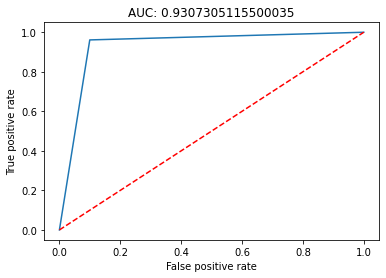

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb, pos_label=1)

auc = roc_auc_score(y_test, y_pred_lgb)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [60]:
etcNew = ExtraTreeClassifier()
etcNew.fit(X_normal_train,y_train)
y_pred_etcNew = etcNew.predict(X_normal_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(etcNew, X_normal_train, y_train, cv= 5 , scoring = 'accuracy', 
                         n_jobs = -1, verbose = 1)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.755625, 0.753125, 0.755625, 0.75125 , 0.74375 ])

In [61]:
scores.mean()

0.751875

In [62]:
accuracy_score(y_test, y_pred_etcNew)

0.765